# Classifying Iris Species 
### Luis Grotti - September 2019

Iris is a genus of flowering plants that contains between 260 and 300 species. 

American botanist Edgar Anderson collected morphological information from three Iris species: setosa, virginica and versicolor. He investigated the length and width of the sepals and petals and gathered the values together in a dataset. This set is called today 'Iris Dataset' and contains 150 samples, 50 per each species.

[![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png 'https://www.datacamp.com/community/tutorials/machine-learning-in-r')](https://www.datacamp.com/community/tutorials/machine-learning-in-r')

Based on this dataset, statistician and biologist Ronald Fisher developed a model to distinguish one species from another. Here we will use our Data Science skills to build a model that can learn from Iris dataset and predict Iris species for new samples. We will use the supervised machine learning algorithm called K-Nearest Neighborhood (**K-NN** from now on). Let's get started.

---

First of all, let's import the dependencies required in this notebook.

In [0]:
import pandas as pd # handle dataframes
import seaborn as sns # handle plot
import numpy as np # handle arrays
import matplotlib.pyplot as plt
from sklearn import datasets # numpy datasets
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neigborhood class
from sklearn.model_selection import train_test_split

Now, let's extract the Iris Dataset from Numpy.

In [4]:
iris_dict = datasets.load_iris()
iris_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

As we can see, Numpy provides a dictionary containing data, target, description and so on. Let's explore what we just got.

In [5]:
print('Features: {}'.format(iris_dict.feature_names))
print('Species: {}'.format(iris_dict.target_names))
print('Species label: {}'.format(np.unique(iris_dict.target)))

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Species: ['setosa' 'versicolor' 'virginica']
Species label: [0 1 2]


Now let's cast **data** and **target** into dataframes and investigate them. 

In [6]:
iris_features = pd.DataFrame(data=iris_dict.data, columns=iris_dict.feature_names)
iris_species = pd.DataFrame(data=iris_dict.target, columns=['species'])

iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As expected we have 150 samples. Also, no missing values was spotted. Let's check how many samples we have for each species.

In [7]:
iris_species['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

That's great! 50 samples per species as expected. Let's see now how the features behave in each species.

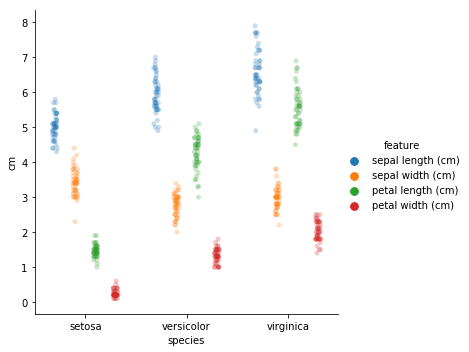

In [8]:
iris_boxplot = iris_features[:]
iris_boxplot = iris_boxplot.join(iris_species)

for i, row in iris_boxplot.iterrows():
    if row['species'] == 0:
      iris_boxplot.loc[i,'species'] = 'setosa'
    elif row['species'] == 1:
      iris_boxplot.loc[i,'species'] = 'versicolor'
    else:
      iris_boxplot.loc[i,'species'] = 'virginica'

iris_boxplot = pd.melt(iris_boxplot, id_vars='species', value_name='cm', var_name='feature')
      
sns.catplot(x = 'species', y= 'cm', hue='feature', data=iris_boxplot, kind='strip', dodge=True, jitter=True, alpha=.25)

That's quite interesting, each species has unique characteristics:

* Petal length are smaller than sepals width for setosa. For versicolor and virginica happen the opposite;
* Values of petals length and petals width are quite different in each species;
* Sepals width and petal length are very close in versicolor;

Based on that, we can see that this dataset can help us to classify new samples and we can teach K-NN algorithm to do this. We will split the dataset into **train** and **test** sets (70%/30%). Train dataset will be used to train K-NN algorithm and the test set will be used to evaluate its accuracy.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(iris_dict.data, iris_dict.target, test_size=.3, random_state=0, shuffle=True)
print('train set size: {}'.format(x_train.shape))
print('test set size: {}'.format(x_test.shape))

train set size: (105, 4)
test set size: (45, 4)



K-NN will classify new samples based on the K nearest neighbors in train set. Note that distance plays a key role in this algorithm.

We will use **K=1** and **euclidean distance** as *metric* to train our model (you can find more metrics [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)). Let's do it!

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

The model is trained! Now let's predict species for test set.

In [11]:
knn.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

We can evaluate how well model made the predictions using **.score**.

In [12]:
knn.score(x_test, y_test)

0.9777777777777777

It means that our model made a correct classification for 97% of our test set.  

---

This is how K-NN algorithm works.

In the future we can go deeper and try to improve the model by using some strategies like cross validation, different numbers for K and different metrics.